# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

a.remove(1)
a.remove(2)
a.remove(3)

# reverse the list

a.reverse()

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a = [1, 2, 3, 4, 5, 6]
a = [i**2 for i in a ]
a

[1, 4, 9, 16, 25, 36]

In [6]:
# create a numpy array from this list
b = np.array(a) # change this
b

array([ 1,  4,  9, 16, 25, 36])

In [7]:
# find the mean of b
b.mean()

15.166666666666666

In [8]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([   1,   16,   81,  256,  625, 1296])

In [9]:
# change b from a length-6 list to a 2x3 matrix
b = np.reshape(b, (2,3))
b

array([[ 1,  4,  9],
       [16, 25, 36]])

In [10]:
# find the mean value of each row
print(b[0].mean())
b[1].mean()

4.666666666666667


25.666666666666668

In [11]:
# find the mean value of each column
print(b[:,0].mean())
print(b[:,1].mean())
print(b[:,2].mean())

8.5
14.5
22.5


In [12]:
# find the third column of b
b[:,2]

array([ 9, 36])

In [13]:
# load in the "starbucks_clean.csv" dataset
df = pd.read_csv("../data/starbucks_clean.csv")

In [14]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df["calories"].mean()

201.58447488584474

In [15]:
# how many different categories of beverages are there?
df["beverage_category"].unique().size

9

In [16]:
# what is the average # calories for each beverage category?
df.groupby("beverage_category")["calories"].mean()

beverage_category
classic espresso drinks            140.172414
coffee                               4.250000
frappuccinoblended coffee          276.944444
frappuccinoblended crme            233.076923
frappuccinolight blended coffee    162.500000
shaken iced beverages              112.500000
signature espresso drinks          250.000000
smoothies                          282.500000
tazotea drinks                     206.666667
Name: calories, dtype: float64

In [17]:
# what beverage preparation includes the most sugar on average?
df.groupby("beverage_prep")["sugars"].mean()

beverage_prep
2% Milk               31.666667
Doppio                 0.000000
Grande                21.500000
Grande Nonfat Milk    39.125000
Short                 11.000000
Short Nonfat Milk     17.090909
Solo                   0.000000
Soymilk               32.467742
Tall                  15.800000
Tall Nonfat Milk      28.772727
Venti                 28.500000
Venti Nonfat Milk     50.571429
Whole Milk            55.687500
Name: sugars, dtype: float64

The whole milk has the most sugar on average

In [18]:
# what is the average % daily value calcium content for each beverage?
df.groupby("beverage")["calcium"].mean()

beverage
banana chocolate smoothie                      20.000000
brewed coffee                                   0.500000
caffamericano                                   1.500000
cafflatte                                      35.000000
caffmocha without whipped cream                30.000000
cappuccino                                     22.500000
caramel                                        11.000000
caramel apple spice without whipped cream       0.000000
caramel macchiato                              28.333333
caramel without whipped cream                  12.000000
coffee                                         12.333333
espresso                                        0.000000
hot chocolate without whipped cream            35.000000
iced brewed coffee with classic syrup           0.000000
iced brewed coffee with milk classic syrup      8.250000
java chip                                      11.666667
java chip without whipped cream                12.555556
mocha                 

In [19]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
dx = df.groupby("beverage").agg({"calories": "mean"})
dx = dx.sort_values(by=["calories"])
dx1 = df.groupby("beverage").agg({"protein": "mean"})
dx1 = dx1.sort_values(by=["protein"], ascending = False)
dx

,calories
beverage,
brewed coffee,4.250000
espresso,7.500000
caffamericano,13.750000
shaken iced tazotea with classic syrup,60.000000
cappuccino,90.000000
iced brewed coffee with classic syrup,93.333333
skinny latte any flavour,110.000000
iced brewed coffee with milk classic syrup,126.250000
cafflatte,139.166667


In [20]:
dx1

,protein
beverage,
banana chocolate smoothie,19.500000
strawberry banana smoothie,16.000000
orange mango banana smoothie,15.666667
white chocolate mocha without whipped cream,12.500000
hot chocolate without whipped cream,11.666667
tazogreen tea latte,11.500000
caffmocha without whipped cream,11.083333
skinny latte any flavour,10.500000
cafflatte,10.416667


The first one that shows up on both of the list is cappuccino, so that is what he should drink. 

beverage
banana chocolate smoothie                      AxesSubplot(0.125,0.125;0.775x0.755)
brewed coffee                                  AxesSubplot(0.125,0.125;0.775x0.755)
caffamericano                                  AxesSubplot(0.125,0.125;0.775x0.755)
cafflatte                                      AxesSubplot(0.125,0.125;0.775x0.755)
caffmocha without whipped cream                AxesSubplot(0.125,0.125;0.775x0.755)
cappuccino                                     AxesSubplot(0.125,0.125;0.775x0.755)
caramel                                        AxesSubplot(0.125,0.125;0.775x0.755)
caramel apple spice without whipped cream      AxesSubplot(0.125,0.125;0.775x0.755)
caramel macchiato                              AxesSubplot(0.125,0.125;0.775x0.755)
caramel without whipped cream                  AxesSubplot(0.125,0.125;0.775x0.755)
coffee                                         AxesSubplot(0.125,0.125;0.775x0.755)
espresso                                       AxesSubplot(0.125,0.

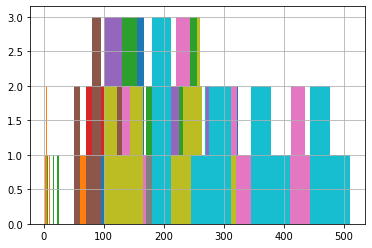

In [21]:
# plot the distribution of the number of calories in drinks using matplotlib
df.groupby("beverage")["calories"].hist()

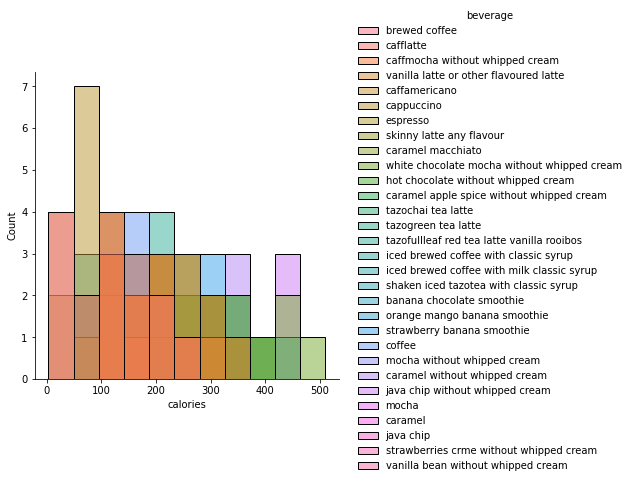

In [22]:
# plot the same distribution using seaborn. what about a density plot instead?
sns.displot(data=df, x="calories", hue = "beverage")

<AxesSubplot:xlabel='calories', ylabel='total fat'>

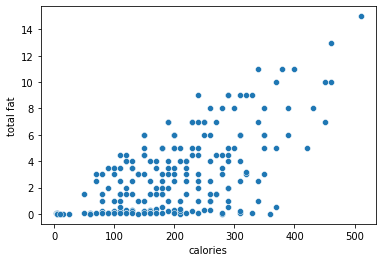

In [23]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df, x="calories", y="total fat")

In [24]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.


In [25]:
short = df[(df["beverage_prep"] == "Short")|(df["beverage_prep"] == "Short Nonfat Milk")]
tall = df[(df["beverage_prep"] == "Tall")|(df["beverage_prep"] == "Tall Nonfat Milk")]
grande = df[(df["beverage_prep"] == "Grande")|(df["beverage_prep"] == "Grande Nonfat Milk")]

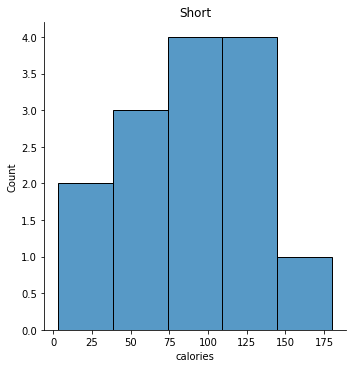

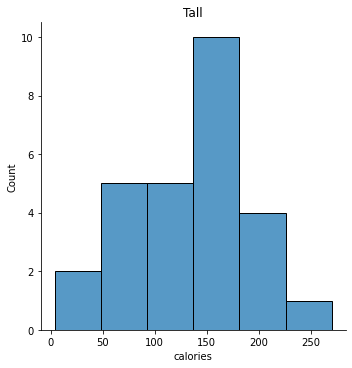

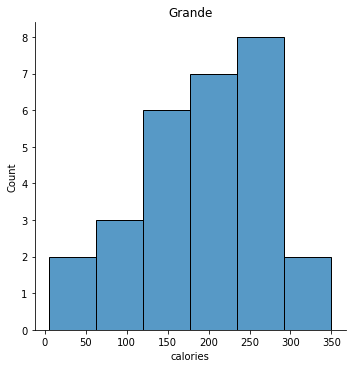

In [26]:
sns.displot(data=short, x="calories").set(title = "Short")
sns.displot(data=tall, x="calories").set(title = "Tall")
sns.displot(data=grande, x="calories").set(title = "Grande")